# TP Deep learning classification problem

In [395]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [399]:
diab=pd.read_csv("diabetes.csv")
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [426]:
diab_x = diab.iloc[:,:-1]
diab_y = diab.iloc[:,-1]

In [427]:
# Define model
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2,input_shape=(32,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Print model Summary
model.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_268 (Dense)           (None, 64)                576       
                                                                 
 dense_269 (Dense)           (None, 32)                2080      
                                                                 
 dropout_51 (Dropout)        (None, 32)                0         
                                                                 
 dense_270 (Dense)           (None, 8)                 264       
                                                                 
 dense_271 (Dense)           (None, 1)                 9         
                                                                 
Total params: 2,929
Trainable params: 2,929
Non-trainable params: 0
_________________________________________________________________


In [428]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(diab_x, diab_y, validation_split=0.33, epochs=150, batch_size=15, verbose=0)
_, accuracy = model.evaluate(diab_x, diab_y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7578
Accuracy: 75.78


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


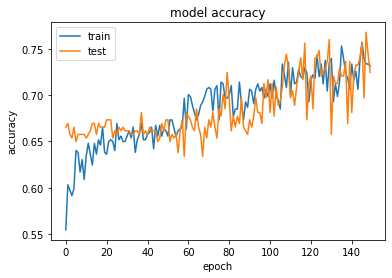

In [429]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

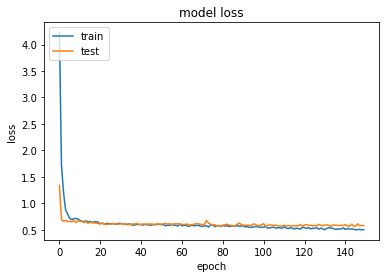

In [430]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()